### Project Overview:
The project focuses on forecasting crime rates in Chicago using time series analysis and Facebook Prophet.
The dataset is sourced from the Chicago Police Department's Citizen Law Enforcement Analysis and Reporting System (CLEAR), spanning 2001–2017, with the project using data from 2005–2017.

### Dataset Details:
Data is divided across three CSV files for the years 2005–2007, 2008–2011, and 2012–2017.
The combined dataset contains approximately 6 million rows and 23 columns, including features like crime type, location, and arrest status.

### Tools and Libraries:
The project is implemented using JupyterNotebook, with data stored on Google Drive.
Key libraries include pandas for data manipulation, matplotlib for visualization, and Facebook Prophet for time series forecasting.

### Data Preprocessing:
Steps include concatenating multiple CSV files, handling missing values, and selecting essential columns (e.g., date, primary crime type, arrest, and location description).
The date column is converted to a datetime format for accurate time-series analysis.

### Exploratory Data Analysis:

Top 10 primary crime types and crime locations are identified (e.g., "theft" and "street").
Boolean filtering is used to analyze arrests based on specific crime types and locations.

### Visualization:
Crime trends are visualized by plotting yearly and monthly distributions, showing a peak in 2009 and a decline thereafter.
Decorations such as titles and axis labels are added for clarity.

### Model Preparation and Training:
Data is aggregated monthly and renamed to fit Prophet’s input requirements (columns ds for date and y for measurements).
The Prophet model is trained on this aggregated dataset.

### Forecasting:
The trained model predicts crime rates for a future period (e.g., 24 months).
Visualization of the forecast includes observed data (black dots) and forecast trends.

### Model Saving and Reuse:
The model is saved using json serialization to avoid retraining.
Predictions can be made directly using the saved model.

### Key Features of Facebook Prophet:
Handles seasonal effects and missing values robustly.
Differentiates between prediction (single outcome) and forecasting (range of outcomes).

**For educational purpose and making things simple we'll use dataset from 2005 - 2017**

# Attributes for Chicago Crime Rate Forecasting Project

1. **ID**: Unique identifier for the crime incident.
2. **Case Number**: Records Division Number assigned to the incident.
3. **Date**: Date when the incident occurred.
4. **Block**: Block address of the incident.
5. **IUCR**: The Illinois Uniform Crime Reporting code.
6. **Primary Type**: The primary description of the crime according to the IUCR code.
7. **Description**: Secondary description of the incident.
8. **Location Description**: Description of the location where the incident occurred.
9. **Arrest**: Indicates if the convict was arrested (`True` or `False`).
10. **Domestic**: Indicates if the incident was domestic-related (`True` or `False`).
11. **Beat**: The smallest police geographic area; each beat has a dedicated police beat car.
12. **District**: The district where the incident occurred.
13. **Ward**: The city council district where the incident occurred.
14. **Community Area**: Chicago has 77 community areas.
15. **FBI Code**: Crime classification according to the FBI's National Incident-Based Reporting System (NIBRS).
16. **X Coordinate**: The X coordinate of the incident.
17. **Y Coordinate**: The Y coordinate of the incident.
18. **Year**: The year the incident occurred.
19. **Updated On**: The date and time the record was last updated.
20. **Latitude**: The latitude of the incident.
21. **Longitude**: The longitude of the incident.
22. **Location**: The geographic location of the incident (latitude and longitude combined).


In [4]:
import pandas as pd

In [5]:
data1 = pd.read_csv('Chicago_Crimes_2005_to_2007.csv',on_bad_lines='warn')
data2 = pd.read_csv('Chicago_Crimes_2008_to_2011.csv',on_bad_lines='warn')
data3 = pd.read_csv('Chicago_Crimes_2012_to_2017.csv',on_bad_lines='warn')

Skipping line 533719: expected 23 fields, saw 24

Skipping line 1149094: expected 23 fields, saw 41



In [6]:
print(pd.__version__)

2.0.3


In [7]:
data = pd.concat([data1,data2,data3])

### 1. Display top 5 rows 

In [9]:
# Set option to display all columns
pd.set_option('display.max_columns', None)

In [10]:
data.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,4673626,HM274058,04/02/2006 01:00:00 PM,055XX N MANGO AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,1622,16.0,45.0,11.0,26,1136872.0,1936499.0,2006,04/15/2016 08:55:02 AM,41.981913,-87.771996,"(41.981912692, -87.771996382)"
1,1,4673627,HM202199,02/26/2006 01:40:48 PM,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False,321,3.0,20.0,42.0,18,1181027.0,1861693.0,2006,04/15/2016 08:55:02 AM,41.775733,-87.611920,"(41.775732538, -87.611919814)"
2,2,4673628,HM113861,01/08/2006 11:16:00 PM,013XX E 69TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False,321,3.0,5.0,69.0,04A,1186023.0,1859609.0,2006,04/15/2016 08:55:02 AM,41.769897,-87.593671,"(41.769897392, -87.593670899)"
3,4,4673629,HM274049,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,False,1633,16.0,38.0,17.0,08B,1134772.0,1922299.0,2006,04/15/2016 08:55:02 AM,41.942984,-87.780057,"(41.942984005, -87.780056951)"
4,5,4673630,HM187120,02/17/2006 09:03:14 PM,037XX W 60TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False,822,8.0,13.0,65.0,18,1152412.0,1864560.0,2006,04/15/2016 08:55:02 AM,41.784211,-87.716745,"(41.784210853, -87.71674491)"


### 2. Display last 5 rows

In [12]:
data.tail()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
1456709,6250330,10508679,HZ250507,05/03/2016 11:33:00 PM,026XX W 23RD PL,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1034,10.0,28.0,30.0,08B,1159105.0,1888300.0,2016,05/10/2016 03:56:50 PM,41.849222,-87.691556,"(41.849222028, -87.69155551)"
1456710,6251089,10508680,HZ250491,05/03/2016 11:30:00 PM,073XX S HARVARD AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,True,True,731,7.0,17.0,69.0,14,1175230.0,1856183.0,2016,05/10/2016 03:56:50 PM,41.760744,-87.633335,"(41.760743949, -87.63333531)"
1456711,6251349,10508681,HZ250479,05/03/2016 12:15:00 AM,024XX W 63RD ST,041A,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,False,825,8.0,15.0,66.0,04B,1161027.0,1862810.0,2016,05/10/2016 03:56:50 PM,41.779235,-87.685207,"(41.779234743, -87.685207125)"
1456712,6253257,10508690,HZ250370,05/03/2016 09:07:00 PM,082XX S EXCHANGE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,True,423,4.0,7.0,46.0,08B,1197261.0,1850727.0,2016,05/10/2016 03:56:50 PM,41.745252,-87.552773,"(41.745251975, -87.552773464)"
1456713,6253474,10508692,HZ250517,05/03/2016 11:38:00 PM,001XX E 75TH ST,5007,OTHER OFFENSE,OTHER WEAPONS VIOLATION,PARKING LOT/GARAGE(NON.RESID.),True,False,323,3.0,6.0,69.0,26,1178696.0,1855324.0,2016,05/10/2016 03:56:50 PM,41.758309,-87.620658,"(41.75830866, -87.620658418)"


### 3. Shape of dataset (No. of rows & columns)

In [14]:
data.shape

(6017767, 23)

In [15]:
print("No. of Rows: ", data.shape[0])
print("No. of Columns: ", data.shape[1])

No. of Rows:  6017767
No. of Columns:  23


**6 Million records with 23 columns**

### 4. Info about dataset

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6017767 entries, 0 to 1456713
Data columns (total 23 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Unnamed: 0            int64  
 1   ID                    int64  
 2   Case Number           object 
 3   Date                  object 
 4   Block                 object 
 5   IUCR                  object 
 6   Primary Type          object 
 7   Description           object 
 8   Location Description  object 
 9   Arrest                bool   
 10  Domestic              bool   
 11  Beat                  int64  
 12  District              float64
 13  Ward                  float64
 14  Community Area        float64
 15  FBI Code              object 
 16  X Coordinate          float64
 17  Y Coordinate          float64
 18  Year                  int64  
 19  Updated On            object 
 20  Latitude              float64
 21  Longitude             float64
 22  Location              object 
dtypes: bool(2), 

### 5. Check Null Values

In [20]:
data.isnull().sum()

Unnamed: 0                  0
ID                          0
Case Number                 7
Date                        0
Block                       0
IUCR                        0
Primary Type                0
Description                 0
Location Description     1974
Arrest                      0
Domestic                    0
Beat                        0
District                   89
Ward                       92
Community Area           1844
FBI Code                    0
X Coordinate            74882
Y Coordinate            74882
Year                        0
Updated On                  0
Latitude                74882
Longitude               74882
Location                74882
dtype: int64

### 6. Select only useful columns

In [22]:
data.columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [23]:
df = data[['ID','Date','Primary Type','Location Description','Arrest','Domestic']]

### For Crime Rate Forecasting:

**1. Focus on columns directly related to time, type of crime, location, and outcomes like arrests.**

**Date:** For time series analysis.

**Primary Type:** To analyze and forecast crime categories.

**Location Description:** To analyze locations prone to crimes.

**Arrest:** To understand crime resolution trends.

**Domestic:** To analyze domestic vs. non-domestic crime patterns

**2. Domain Knowledge**
Use insights from the domain (e.g., law enforcement or criminology) to decide what data is essential.
For example:
Columns like Beat, District, or Ward could be included if analyzing trends across different administrative regions.

In [25]:
df.head()

,ID,Date,Primary Type,Location Description,Arrest,Domestic
0,4673626,04/02/2006 01:00:00 PM,OTHER OFFENSE,RESIDENCE,False,False
1,4673627,02/26/2006 01:40:48 PM,NARCOTICS,SIDEWALK,True,False
2,4673628,01/08/2006 11:16:00 PM,ASSAULT,OTHER,False,False
3,4673629,04/05/2006 06:45:00 PM,BATTERY,RESIDENCE,False,False
4,4673630,02/17/2006 09:03:14 PM,NARCOTICS,ALLEY,True,False


### 7. Check Null Values

In [27]:
df.isnull().sum()

ID                         0
Date                       0
Primary Type               0
Location Description    1974
Arrest                     0
Domestic                   0
dtype: int64

### Drop Null Values

In [29]:
df = df.dropna()

In [30]:
df.isnull().sum()

ID                      0
Date                    0
Primary Type            0
Location Description    0
Arrest                  0
Domestic                0
dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6015793 entries, 0 to 1456713
Data columns (total 6 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   ID                    int64 
 1   Date                  object
 2   Primary Type          object
 3   Location Description  object
 4   Arrest                bool  
 5   Domestic              bool  
dtypes: bool(2), int64(1), object(3)
memory usage: 241.0+ MB


**Date column is object which needs to be converted to DateTime column**

In [33]:
df.Date = pd.to_datetime(df.Date,format = '%m/%d/%Y %I:%M:%S %p')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6015793 entries, 0 to 1456713
Data columns (total 6 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Date                  datetime64[ns]
 2   Primary Type          object        
 3   Location Description  object        
 4   Arrest                bool          
 5   Domestic              bool          
dtypes: bool(2), datetime64[ns](1), int64(1), object(2)
memory usage: 241.0+ MB


In [35]:
print(df.columns)

Index(['ID', 'Date', 'Primary Type', 'Location Description', 'Arrest',
       'Domestic'],
      dtype='object')


In [85]:
print(df['Date'])

0         2006-04-02 13:00:00
1         2006-02-26 13:40:48
2         2006-01-08 23:16:00
3         2006-04-05 18:45:00
4         2006-02-17 21:03:14
                  ...        
1456709   2016-05-03 23:33:00
1456710   2016-05-03 23:30:00
1456711   2016-05-03 00:15:00
1456712   2016-05-03 21:07:00
1456713   2016-05-03 23:38:00
Name: Date, Length: 6015793, dtype: datetime64[ns]


In [95]:
df['ID'].unique()

array([ 4673626,  4673627,  4673628, ..., 10508681, 10508690, 10508692],
      dtype=int64)

In [ ]:
df['Arrest'].unique()

In [97]:
df['Location Description'].unique()

array(['RESIDENCE', 'SIDEWALK', 'OTHER', 'ALLEY', 'APARTMENT',
       'SCHOOL, PUBLIC, BUILDING', 'STREET',
       'PARKING LOT/GARAGE(NON.RESID.)', 'CHA HALLWAY/STAIRWELL/ELEVATOR',
       'PARK PROPERTY', 'SCHOOL, PUBLIC, GROUNDS',
       'COMMERCIAL / BUSINESS OFFICE', 'RESIDENCE PORCH/HALLWAY',
       'VEHICLE-COMMERCIAL', 'VACANT LOT/LAND', 'VEHICLE NON-COMMERCIAL',
       'DRUG STORE', 'RESIDENTIAL YARD (FRONT/BACK)',
       'SCHOOL, PRIVATE, BUILDING', 'CHURCH/SYNAGOGUE/PLACE OF WORSHIP',
       'RESTAURANT', 'CHA PARKING LOT/GROUNDS', 'GAS STATION',
       'CURRENCY EXCHANGE', 'POLICE FACILITY/VEH PARKING LOT',
       'CTA PLATFORM', 'WAREHOUSE', 'RESIDENCE-GARAGE',
       'SMALL RETAIL STORE', 'CTA TRAIN', 'BARBERSHOP', 'HOTEL/MOTEL',
       'DEPARTMENT STORE', 'GROCERY FOOD STORE', 'BANK',
       'FACTORY/MANUFACTURING BUILDING', 'ATM (AUTOMATIC TELLER MACHINE)',
       'CAR WASH', 'LIBRARY', 'GOVERNMENT BUILDING/PROPERTY',
       'ATHLETIC CLUB', 'DRIVEWAY - RESIDENTIAL', 'C

### 8. Top 10 primary crime types

In [38]:
df['Primary Type'].value_counts().head(10)

Primary Type
THEFT                  1244395
BATTERY                1079174
CRIMINAL DAMAGE         702696
NARCOTICS               674829
BURGLARY                369053
OTHER OFFENSE           368168
ASSAULT                 360242
MOTOR VEHICLE THEFT     271624
ROBBERY                 229463
DECEPTIVE PRACTICE      223947
Name: count, dtype: int64

### 9. How many criminals arrested having primary crime type = Theft ?

In [40]:
 df[df['Primary Type'] == 'THEFT']['Arrest'].value_counts()

Arrest
False    1103085
True      141310
Name: count, dtype: int64

### 10. Top 10 Crime Location Descriptions

In [100]:
df['Location Description'].value_counts().head(10)

Location Description
STREET                            1517724
RESIDENCE                          991977
SIDEWALK                           674793
APARTMENT                          668298
OTHER                              216154
PARKING LOT/GARAGE(NON.RESID.)     166331
ALLEY                              137094
SCHOOL, PUBLIC, BUILDING           128852
RESIDENCE-GARAGE                   119619
VEHICLE NON-COMMERCIAL             107554
Name: count, dtype: int64

### 11. How many are Arrested having Location Type = Street

In [119]:
 df[df['Location Description'] == 'STREET']['Arrest'].value_counts()

Arrest
False    1093718
True      424006
Name: count, dtype: int64

### Visualization

In [124]:
df.index = pd.DatetimeIndex(df.Date)

In [126]:
df

,ID,Date,Primary Type,Location Description,Arrest,Domestic
Date,,,,,,
2006-04-02 13:00:00,4673626,2006-04-02 13:00:00,OTHER OFFENSE,RESIDENCE,False,False
2006-02-26 13:40:48,4673627,2006-02-26 13:40:48,NARCOTICS,SIDEWALK,True,False
2006-01-08 23:16:00,4673628,2006-01-08 23:16:00,ASSAULT,OTHER,False,False
2006-04-05 18:45:00,4673629,2006-04-05 18:45:00,BATTERY,RESIDENCE,False,False
2006-02-17 21:03:14,4673630,2006-02-17 21:03:14,NARCOTICS,ALLEY,True,False
...,...,...,...,...,...,...
2016-05-03 23:33:00,10508679,2016-05-03 23:33:00,BATTERY,APARTMENT,True,True
2016-05-03 23:30:00,10508680,2016-05-03 23:30:00,CRIMINAL DAMAGE,APARTMENT,True,True
2016-05-03 00:15:00,10508681,2016-05-03 00:15:00,BATTERY,SIDEWALK,False,False


In [130]:
import matplotlib.pyplot as plt

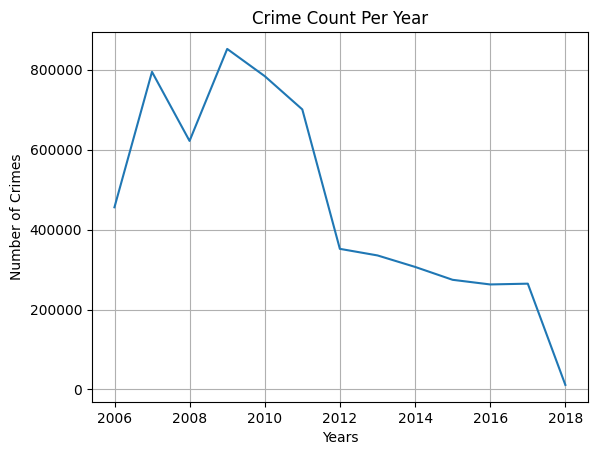

In [140]:
plt.plot(df.resample('Y').size()) # yearly crime count
plt.title('Crime Count Per Year')
plt.xlabel('Years')
plt.ylabel('Number of Crimes')
plt.grid(True)  # Add grid for better visualization

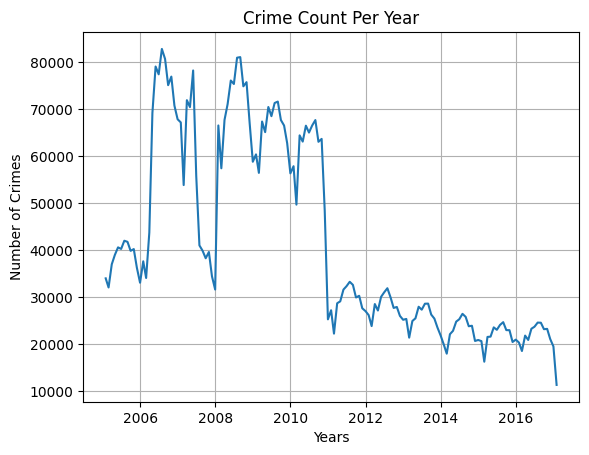

In [138]:
plt.plot(df.resample('M').size()) # yearly crime count
plt.title('Crime Count Per Year')
plt.xlabel('Years')
plt.ylabel('Number of Crimes')
plt.grid(True)  # Add grid for better visualization

### Preparing Data For Forecasting

In [143]:
df_prophet = pd.DataFrame(df.resample('M').size().reset_index())

In [145]:
df_prophet # monthwise crime count

,Date,0
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36968
3,2005-04-30,38963
4,2005-05-31,40570
...,...,...
140,2016-09-30,23176
141,2016-10-31,23243
142,2016-11-30,21077
143,2016-12-31,19517


In [149]:
df_prophet.columns = ['Date','Crime Count'] # rename columns

In [151]:
df_prophet

,Date,Crime Count
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36968
3,2005-04-30,38963
4,2005-05-31,40570
...,...,...
140,2016-09-30,23176
141,2016-10-31,23243
142,2016-11-30,21077
143,2016-12-31,19517


### Rename The Coumns

ds and y  **ds is datestamp and y should be numerical that is to be forecasted**

In [157]:
df_prophet = df_prophet.rename(columns = {'Date':'ds','Crime Count':'y'})

In [159]:
df_prophet

,ds,y
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36968
3,2005-04-30,38963
4,2005-05-31,40570
...,...,...
140,2016-09-30,23176
141,2016-10-31,23243
142,2016-11-30,21077
143,2016-12-31,19517


### Train The Model / FB Prophet

In [164]:
pip install prophet

   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   -------------------------- ------------- 8.9/13.3 MB 42.6 MB/s eta 0:00:01
   ---------------------------------------- 13.3/13.3 MB 38.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ---------------------------------------- 1.1/1.1 MB 26.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [166]:
from prophet import Prophet

In [168]:
m = Prophet() # Model Training
m.fit(df_prophet)

18:55:54 - cmdstanpy - INFO - Chain [1] start processing
18:55:54 - cmdstanpy - INFO - Chain [1] done processing


### Make predictions

In [171]:
pred = m.make_future_dataframe(periods=24,freq='M')
forecast = m.predict(pred)

**Prediction :  Prediction refers to estimating a single value or outcome based on given input data.**

**Forecasting : Forecasting is a subset of prediction that involves predicting future values over a range of time. It often includes a range of possible outcomes and associated uncertainty.**

In [177]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2005-01-31,60513.668250,39572.001870,72898.818031,60513.668250,60513.668250,-4715.633809,-4715.633809,-4715.633809,-4715.633809,-4715.633809,-4715.633809,0.0,0.0,0.0,55798.034441
1,2005-02-28,60381.260925,33605.066727,67999.057952,60381.260925,60381.260925,-9482.143323,-9482.143323,-9482.143323,-9482.143323,-9482.143323,-9482.143323,0.0,0.0,0.0,50899.117602
2,2005-03-31,60234.667100,43545.899264,76914.082460,60234.667100,60234.667100,-1209.480782,-1209.480782,-1209.480782,-1209.480782,-1209.480782,-1209.480782,0.0,0.0,0.0,59025.186318
3,2005-04-30,60092.802109,43890.548057,77188.021877,60092.802109,60092.802109,1173.277170,1173.277170,1173.277170,1173.277170,1173.277170,1173.277170,0.0,0.0,0.0,61266.079279
4,2005-05-31,59946.208284,47667.833164,81785.843314,59946.208284,59946.208284,5476.644657,5476.644657,5476.644657,5476.644657,5476.644657,5476.644657,0.0,0.0,0.0,65422.852941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,2018-09-30,6973.131110,-7767.673847,25079.342519,6616.327219,7379.475095,1814.065181,1814.065181,1814.065181,1814.065181,1814.065181,1814.065181,0.0,0.0,0.0,8787.196291
165,2018-10-31,6568.025474,-7412.627942,25598.208490,6181.504007,6999.850371,2457.922118,2457.922118,2457.922118,2457.922118,2457.922118,2457.922118,0.0,0.0,0.0,9025.947591
166,2018-11-30,6175.987761,-11044.892246,21042.573456,5751.878330,6635.336729,-2014.209016,-2014.209016,-2014.209016,-2014.209016,-2014.209016,-2014.209016,0.0,0.0,0.0,4161.778745
167,2018-12-31,5770.882125,-16287.272485,16950.690242,5317.354159,6274.364581,-5977.865980,-5977.865980,-5977.865980,-5977.865980,-5977.865980,-5977.865980,0.0,0.0,0.0,-206.983855


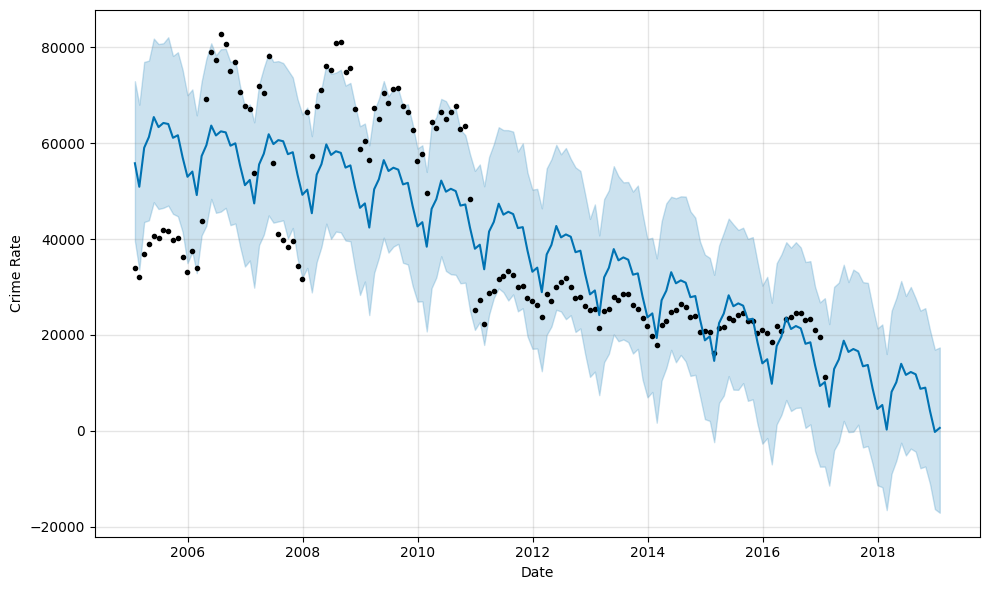

In [183]:
fig = m.plot(forecast, xlabel='Date', ylabel='Crime Rate')

**1. Black Dots (Observed Data)**
    - These represent the actual crime rates observed in the historical dataset.
    - They serve as the input data used to train the Prophet model.
    - Their distribution shows how crime rates fluctuate over time.

**2. Blue Line (Forecasted Values)**
    - This represents the predicted trend of crime rates based on the model's analysis.
    - It is the model's best estimate for crime rates at any given point in time.
    - The blue line captures seasonal patterns, trends, and overall fluctuations.

**3. Shaded Blue Area (Uncertainty Interval)**
    -The shaded area represents the confidence intervals for the forecast.
    -The inner and outer bands correspond to different levels of uncertainty:
    -The darker blue band: 80% confidence interval.
    - The lighter blue band: 95% confidence interval.
    - It reflects the range within which the model expects the actual crime rate to fall. A wider band indicates higher uncertainty.

**4. X-Axis (Date)**
    -The x-axis shows the timeline (years).
    - It includes both the historical period (where the black dots exist) and the future forecasted period (where there are no black dots).

**5. Y-Axis (Crime Rate)**
    -The y-axis represents the crime rate (number of crimes per time period).
    -It shows the scale of crime rates, with peaks and valleys corresponding to higher and lower levels of crime, respectively.


### Insights from the Plot:

**1. Historical Trend (2005-2017):**
  - There is a declining trend in crime rates over time, though fluctuations (seasonality) are visible within each year.
  - Peaks occur periodically, suggesting a strong seasonal effect (e.g., crime rates might rise during certain months).

**2. Forecasted Period (Post-2017):**
  - The blue line continues the downward trend in crime rates, projecting further reductions.
  - The uncertainty intervals widen as the forecast extends into the future, reflecting increasing uncertainty.

**3. Seasonality:**
  - The periodic rise and fall of the blue line indicate seasonal effects in crime rates, which the model has identified and incorporated into its forecast.

**Key Takeaways:**
  - The model predicts a continued decline in crime rates with seasonal fluctuations.
  - The confidence intervals widen over time, reflecting uncertainty in long-term predictions.
  - The alignment of the forecasted blue line with historical black dots suggests the model is capturing the underlying trends and patterns effectively.


### Save the Model

In [193]:
import json
from prophet.serialize import model_to_json, model_from_json

# Save the model to a JSON file
with open('prophet_model.json', 'w') as fout:
    json.dump(model_to_json(m), fout)  # Save the trained model

# Load the model from the JSON file
with open('prophet_model.json', 'r') as fin:
    m1 = model_from_json(json.load(fin))  # Load the saved model

# Prompt the user to enter the number of months to forecast
x = int(input("Enter the number of months to forecast: "))


Enter the number of months to forecast:  24


In [195]:
pred = m1.make_future_dataframe(periods=x , freq='M')
forecast = m1.predict(pred)

In [197]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2005-01-31,60513.668250,40469.735604,73462.128321,60513.668250,60513.668250,-4715.633809,-4715.633809,-4715.633809,-4715.633809,-4715.633809,-4715.633809,0.0,0.0,0.0,55798.034441
1,2005-02-28,60381.260925,33879.596184,67386.001588,60381.260925,60381.260925,-9482.143323,-9482.143323,-9482.143323,-9482.143323,-9482.143323,-9482.143323,0.0,0.0,0.0,50899.117602
2,2005-03-31,60234.667100,42838.473845,76542.135251,60234.667100,60234.667100,-1209.480782,-1209.480782,-1209.480782,-1209.480782,-1209.480782,-1209.480782,0.0,0.0,0.0,59025.186318
3,2005-04-30,60092.802109,45459.169133,77723.352475,60092.802109,60092.802109,1173.277170,1173.277170,1173.277170,1173.277170,1173.277170,1173.277170,0.0,0.0,0.0,61266.079279
4,2005-05-31,59946.208284,48504.599750,82308.551990,59946.208284,59946.208284,5476.644657,5476.644657,5476.644657,5476.644657,5476.644657,5476.644657,0.0,0.0,0.0,65422.852941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,2018-09-30,6973.131110,-7350.133727,25078.508534,6622.132103,7317.829415,1814.065181,1814.065181,1814.065181,1814.065181,1814.065181,1814.065181,0.0,0.0,0.0,8787.196291
165,2018-10-31,6568.025474,-8647.936881,26881.863984,6187.200077,6943.034655,2457.922118,2457.922118,2457.922118,2457.922118,2457.922118,2457.922118,0.0,0.0,0.0,9025.947591
166,2018-11-30,6175.987761,-11628.431865,21452.334099,5768.344693,6588.689333,-2014.209016,-2014.209016,-2014.209016,-2014.209016,-2014.209016,-2014.209016,0.0,0.0,0.0,4161.778745
167,2018-12-31,5770.882125,-17052.823307,15968.753982,5333.950491,6209.906365,-5977.865980,-5977.865980,-5977.865980,-5977.865980,-5977.865980,-5977.865980,0.0,0.0,0.0,-206.983855


### **Key Parameters**

1. **`periods=24`**  
   Specifies the number of future time periods to predict (e.g., 24 months for 2 years).

2. **`freq='M'`**  
   Indicates the frequency of the future periods:
   - `'M'`: Monthly.
   - `'D'`: Daily.
   - `'Y'`: Yearly.

3. **Prediction Columns in the Forecast**  
   The forecast DataFrame contains:
   - **`yhat`**: Predicted values.
   - **`yhat_lower`** and **`yhat_upper`**: Lower and upper bounds of the uncertainty interval.


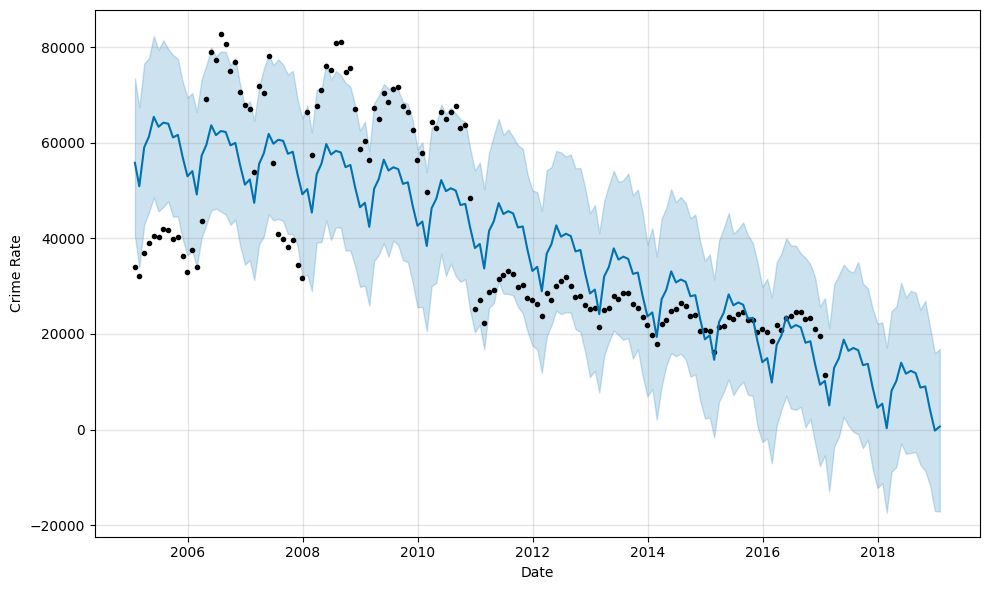

In [199]:
fig = m1.plot(forecast, xlabel='Date', ylabel='Crime Rate')